In [1]:
import pandas as pd
import numpy as np

In [2]:
data_dir = "data/"

In [3]:
payroll = pd.read_csv("data/Citywide_Payroll_Data__Fiscal_Year_.csv")

In [4]:
agencies = payroll["Agency Name"].unique()
agencies

array(['DISTRICT ATTORNEY-MANHATTAN', 'POLICE DEPARTMENT',
       'DISTRICT ATTORNEY KINGS COUNTY', 'DISTRICT ATTORNEY QNS COUNTY',
       'BRONX DISTRICT ATTORNEY', 'DISTRICT ATTORNEY RICHMOND COU',
       "ADMIN FOR CHILDREN'S SVCS", 'ADMIN TRIALS AND HEARINGS',
       'BOARD OF ELECTION POLL WORKERS', 'BOROUGH PRESIDENT-QUEENS',
       'DISTRICT ATTORNEY-SPECIAL NARC', 'BOARD OF CORRECTION',
       'BOARD OF ELECTION', 'BOROUGH PRESIDENT-BRONX',
       'BOROUGH PRESIDENT-BROOKLYN', 'BOROUGH PRESIDENT-STATEN IS',
       'BRONX COMMUNITY BOARD #1', 'BRONX COMMUNITY BOARD #10',
       'BRONX COMMUNITY BOARD #11', 'BRONX COMMUNITY BOARD #12',
       'BRONX COMMUNITY BOARD #2', 'BRONX COMMUNITY BOARD #3',
       'BRONX COMMUNITY BOARD #4', 'BRONX COMMUNITY BOARD #5',
       'BRONX COMMUNITY BOARD #6', 'BRONX COMMUNITY BOARD #7',
       'BRONX COMMUNITY BOARD #8', 'BRONX COMMUNITY BOARD #9',
       'BROOKLYN COMMUNITY BOARD #1', 'BROOKLYN COMMUNITY BOARD #10',
       'BROOKLYN COMMUNITY B

In [69]:
pd.set_option('display.float_format', '{:,.2f}'.format)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    payroll_counts = pd.pivot_table(payroll[payroll["Fiscal Year"]==2019][['Agency Name','Base Salary', 'Total OT Paid']], index="Agency Name", aggfunc=np.sum)
    #payroll_counts["total"] = payroll_counts["Base Salary"] + payroll_counts["Total OT Paid"]
    payroll_counts = payroll_counts.assign(Total = payroll_counts["Base Salary"] + payroll_counts["Total OT Paid"])
    print(payroll_counts.sort_values(by="Total").to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Base Salary</th>
      <th>Total OT Paid</th>
      <th>Total</th>
    </tr>
    <tr>
      <th>Agency Name</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>PUBLIC SERVICE CORPS</th>
      <td>3,587.80</td>
      <td>0.00</td>
      <td>3,587.80</td>
    </tr>
    <tr>
      <th>PERSONNEL MONITORS</th>
      <td>6,885.00</td>
      <td>10,465.50</td>
      <td>17,350.50</td>
    </tr>
    <tr>
      <th>BOARD OF ELECTION POLL WORKERS</th>
      <td>37,301.00</td>
      <td>0.00</td>
      <td>37,301.00</td>
    </tr>
    <tr>
      <th>BROOKLYN COMMUNITY BOARD #9</th>
      <td>96,729.28</td>
      <td>0.00</td>
      <td>96,729.28</td>
    </tr>
    <tr>
      <th>STATEN ISLAND COMMUNITY BD #2</th>
      <td>105,799.84</td>
      <td>0.00</td>
      <td>105,799.84</td>
    </tr>
    <tr>
      <th>MANHATTAN COMMUNITY BOARD #

In [6]:
teacher_payroll = payroll[payroll["Agency Name"]=="DEPT OF ED PEDAGOGICAL"]
teacher_payroll = teacher_payroll[teacher_payroll["Fiscal Year"]==2019]
print(len(teacher_payroll))

112067


In [7]:
cop_payroll = payroll[payroll["Agency Name"] == "POLICE DEPARTMENT"]
cop_payroll = cop_payroll[cop_payroll["Fiscal Year"] == 2019]
print(len(cop_payroll))

59970


In [8]:
cop_payroll.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
3273110,2019,56.00,POLICE DEPARTMENT,MAMUN,ABDULLAH,A,09/25/2017,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,"38,986.00",per Annum,"2,040.00","38,702.16",435.50,"13,119.41","1,198.16"
3273111,2019,56.00,POLICE DEPARTMENT,NESTOR,JEANLUC,B,01/16/2018,QUEENS,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,"38,986.00",per Annum,"2,040.00","38,674.45",192.75,"5,922.05","2,094.88"
3273112,2019,56.00,POLICE DEPARTMENT,LEKHAK,TRIBHUWAN,NaN,09/25/2017,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,"38,986.00",per Annum,"2,040.00","38,702.16",615.50,"18,006.87",881.99
3273113,2019,56.00,POLICE DEPARTMENT,ODUWOLE,ADEBOLA,O,06/18/2018,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,"38,986.00",per Annum,"2,032.00","39,117.78",349.50,"9,732.59","1,418.46"
3273114,2019,56.00,POLICE DEPARTMENT,DOWNING-KOHN,SUSAN,E,08/31/1998,MANHATTAN,SERGEANT-,CEASED,"109,360.00",per Annum,354.32,"40,338.51",85.50,"8,761.41","5,515.13"


In [9]:
total_dollars = cop_payroll["Regular Gross Paid"].sum() + cop_payroll["Total Other Pay"].sum() + cop_payroll["Total OT Paid"].sum()
# total_dollars = cop_payroll["Base Salary"].sum() + cop_payroll["Total OT Paid"].sum()

print("total base", f'{cop_payroll["Base Salary"].sum():,}')
print("total gross", f'{cop_payroll["Regular Gross Paid"].sum():,}')
print("total other", f'{cop_payroll["Total Other Pay"].sum():,}')
print("total OT", f'{cop_payroll["Total OT Paid"].sum():,}')
print("OT hours", f'{cop_payroll["OT Hours"].sum():,}')
print("total $$$", f'{total_dollars:,}')

total base 4,109,923,694.94
total gross 3,895,716,912.5
total other 538,739,298.94
total OT 727,903,579.2800001
OT hours 11,597,478.129999999
total $$$ 5,162,359,790.72


In [10]:
arrest_data = pd.read_csv("data/NYPD_Arrests_Data__Historic_.csv")

In [11]:
arrest_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.00,"MARIJUANA, POSSESSION",678.00,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.00,25-44,M,BLACK,"1,063,056.00","207,463.00",40.74,-73.72
1,173114463,12/31/2017,478.00,"THEFT OF SERVICES, UNCLASSIFIED",343.00,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.00,25-44,M,ASIAN / PACIFIC ISLANDER,"1,009,113.00","219,613.00",40.77,-73.91
2,173113513,12/31/2017,849.00,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.00,OTHER STATE LAWS,LOC000000V,V,K,73,1.00,18-24,M,BLACK,"1,010,719.00","186,857.00",40.68,-73.90
3,173113423,12/31/2017,101.00,ASSAULT 3,344.00,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.00,25-44,M,WHITE,"987,831.00","217,446.00",40.76,-73.99
4,173113421,12/31/2017,101.00,ASSAULT 3,344.00,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.00,45-64,M,BLACK,"987,073.00","216,078.00",40.76,-73.99


In [49]:
arrests_2019 = arrest_data[arrest_data['ARREST_DATE'].str.contains('2019')]

In [13]:
# arrest_totals = pd.pivot_table(arrests_2019,index=["OFNS_DESC"], aggfunc='count')
# arrest_totals

In [14]:
arrest_types = arrests_2019["OFNS_DESC"].unique()

### Count of Level of offense (2019): felony, misdemeanor, violation

In [70]:
arrests_2019['LAW_CAT_CD'].value_counts()

M    126609
F     83384
V      2822
I       433
Name: LAW_CAT_CD, dtype: int64

### Counts arrests (2019)

In [72]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    arrest_counts = arrests_2019['OFNS_DESC'].value_counts()
    #print(arrest_counts.axes)
    print(arrest_counts)


ASSAULT 3 & RELATED OFFENSES            31988
PETIT LARCENY                           21627
DANGEROUS DRUGS                         21071
FELONY ASSAULT                          15208
VEHICLE AND TRAFFIC LAWS                14243
MISCELLANEOUS PENAL LAW                 12325
CRIMINAL MISCHIEF & RELATED OF           9971
GRAND LARCENY                            9913
ROBBERY                                  9259
DANGEROUS WEAPONS                        7921
OFFENSES AGAINST PUBLIC ADMINI           7748
FORGERY                                  4799
INTOXICATED & IMPAIRED DRIVING           4653
BURGLARY                                 4451
OTHER OFFENSES RELATED TO THEF           4262
OFF. AGNST PUB ORD SENSBLTY &            4222
SEX CRIMES                               4152
CRIMINAL TRESPASS                        3250
OTHER TRAFFIC INFRACTION                 3125
POSSESSION OF STOLEN PROPERTY            2241
FOR OTHER AUTHORITIES                    1369
OFFENSES INVOLVING FRAUD          

In [65]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    arrest_counts_pd = arrests_2019['PD_DESC'].value_counts()
    print(arrest_counts_pd)


ASSAULT 3                                                 24513
LARCENY,PETIT FROM OPEN AREAS,                            21568
TRAFFIC,UNCLASSIFIED MISDEMEAN                            13624
ASSAULT 2,1,UNCLASSIFIED                                  11498
CONTROLLED SUBSTANCE, POSSESSI                             9235
ROBBERY,OPEN AREA UNCLASSIFIED                             9235
LARCENY,GRAND FROM OPEN AREAS, UNATTENDED                  8628
PUBLIC ADMINISTRATION,UNCLASSI                             7795
INTOXICATED DRIVING,ALCOHOL                                5120
FORGERY,ETC.,UNCLASSIFIED-FELO                             4708
MENACING,UNCLASSIFIED                                      4258
THEFT OF SERVICES, UNCLASSIFIE                             4194
CRIMINAL MISCHIEF,UNCLASSIFIED 4                           4073
CONTROLLED SUBSTANCE,INTENT TO                             3949
BURGLARY,UNCLASSIFIED,UNKNOWN                              3892
AGGRAVATED HARASSMENT 2                 

### Notes on crime types:

1. The lowest-level theft offense in New York is called "petit larceny," or petty theft, which is the unlawful taking of property or services valued at no more than $1,000

2. Each arrest costs around 24,000 in person hours, or 519,048,000 total for all petty theft arrests. Let's say that each petit theft was in fact for the maximum 1000, meaning the total value of goods stolen is 21,627,000. This means that if the city simply reimbursed for lost property instead of arresting people it would save New York 497,421,000.

3. "assault 3" is assault in the 3rd degree: "Assault in the third degree is the top charge when there are only minor injuries, weapons are not used, and the victim does not fall into a special protected category" (SCUFFLES)

4. Escape 3: A person is guilty of escape in the third degree when he escapes from custody!

5. I am confused about "OFFENSES AGAINST PUBLIC ADMINI" - it seems to encompass a ton of stuff

6. "Theft of services" (4194 arrests) can include riding public transit without a pass

In [18]:
human_dollars_per_arrest = total_dollars / len(arrests_2019)
human_dollars_per_arrest

24053.825143022223

## Complaint Data

In [19]:
# load historical complaint data
complaint_data = pd.read_csv(data_dir + "NYPD_Complaint_Data_Historic.csv")

In [20]:
complaint_data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,NaN,NaN,43.00,08/30/2006,578,HARRASSMENT 2,638.00,...,M,nan,40.83,-73.88,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,11/05/2006,17:40:00,66.00,11/05/2006,107,BURGLARY,221.00,...,NaN,nan,40.64,-74.01,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
2,631420068,09/08/2006,23:30:00,09/09/2006,00:01:00,106.00,09/09/2006,347,INTOXICATED & IMPAIRED DRIVING,905.00,...,NaN,nan,40.68,-73.84,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,E
3,995609899,12/13/2011,18:40:00,12/13/2011,18:49:00,79.00,12/13/2011,341,PETIT LARCENY,333.00,...,NaN,nan,40.69,-73.94,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,480667624,08/14/2009,04:20:00,NaN,NaN,30.00,08/14/2009,113,FORGERY,729.00,...,NaN,nan,40.83,-73.94,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E


### Attempted vs Completed Crimes

In [21]:
complaint_data["CRM_ATPT_CPTD_CD"].value_counts()

COMPLETED    7184747
ATTEMPTED     124901
Name: CRM_ATPT_CPTD_CD, dtype: int64

### Just 2019

In [22]:
complaint_data[complaint_data["CMPLNT_FR_DT"].notnull() & complaint_data["CMPLNT_FR_DT"].str.contains('2019')]["CRM_ATPT_CPTD_CD"].value_counts()

COMPLETED    775078
ATTEMPTED     13081
Name: CRM_ATPT_CPTD_CD, dtype: int64

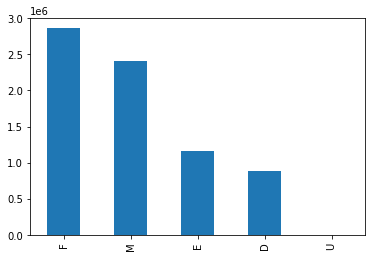

In [23]:
complaint_data["VIC_SEX"].value_counts().plot(kind='bar')

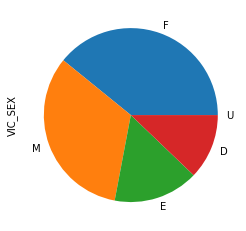

In [26]:
complaint_data["VIC_SEX"].value_counts().plot(kind='pie')

In [24]:
complaint_data["VIC_RACE"].value_counts()

UNKNOWN                           2426512
BLACK                             1748928
WHITE                             1256541
WHITE HISPANIC                    1175530
ASIAN / PACIFIC ISLANDER           420465
BLACK HISPANIC                     247251
AMERICAN INDIAN/ALASKAN NATIVE      34089
OTHER                                  31
Name: VIC_RACE, dtype: int64

In [25]:
complaint_data["SUSP_RACE"].value_counts()

BLACK                             1458294
UNKNOWN                           1003068
WHITE HISPANIC                     665694
WHITE                              427965
BLACK HISPANIC                     202657
ASIAN / PACIFIC ISLANDER           125879
AMERICAN INDIAN/ALASKAN NATIVE      12130
OTHER                                  11
Name: SUSP_RACE, dtype: int64

In [28]:
complaints_2019 = complaint_data[complaint_data["CMPLNT_FR_DT"].notnull() & complaint_data["CMPLNT_FR_DT"].str.contains('2019')]

In [63]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    complaint_counts = complaints_2019['OFNS_DESC'].value_counts()
    print(complaint_counts)



PETIT LARCENY                           152056
HARRASSMENT 2                           123982
ASSAULT 3 & RELATED OFFENSES             92619
CRIMINAL MISCHIEF & RELATED OF           81065
GRAND LARCENY                            70572
FELONY ASSAULT                           35993
OFF. AGNST PUB ORD SENSBLTY &            33261
MISCELLANEOUS PENAL LAW                  24699
DANGEROUS DRUGS                          23617
ROBBERY                                  22859
BURGLARY                                 18280
OFFENSES AGAINST PUBLIC ADMINI           13327
VEHICLE AND TRAFFIC LAWS                 11712
DANGEROUS WEAPONS                        11381
SEX CRIMES                               10973
GRAND LARCENY OF MOTOR VEHICLE            9242
FORGERY                                   8381
INTOXICATED & IMPAIRED DRIVING            7765
THEFT-FRAUD                               5537
CRIMINAL TRESPASS                         5354
FRAUDS                                    3336
UNAUTHORIZED 

In [64]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    complaint_counts_pd = complaints_2019['PD_DESC'].value_counts()
    print(complaint_counts_pd)


HARASSMENT,SUBD 3,4,5                                                      89447
ASSAULT 3                                                                  74639
LARCENY,PETIT FROM STORE-SHOPL                                             58877
HARASSMENT,SUBD 1,CIVILIAN                                                 34535
AGGRAVATED HARASSMENT 2                                                    30979
ASSAULT 2,1,UNCLASSIFIED                                                   27014
LARCENY,PETIT FROM BUILDING,UN                                             25714
MISCHIEF, CRIMINAL 4, OF MOTOR                                             23202
CRIMINAL MISCHIEF,UNCLASSIFIED 4                                           20146
LARCENY,PETIT FROM AUTO                                                    19111
CRIMINAL MISCHIEF 4TH, GRAFFIT                                             17680
CRIMINAL CONTEMPT 1                                                        15020
LARCENY,PETIT FROM OPEN AREA

## Comparing Complaints to Arrests in 2019

In [57]:
#arrests_2019 = arrests_2019["OFNS_DESC"].notnull()

for index, c in complaints_2019[0:10].iterrows():
    #print(c)
    date = c["CMPLNT_FR_DT"]
    offense = c["PD_DESC"]
    #susp_race = c["SUSP_RACE"]
    #susp_sex = c["SUP_SEX"]
    #print(offense)
    # print(date)
    potentials = arrests_2019[arrests_2019["PD_DESC"]==offense]
    print(date, offense, len(potentials))

11/30/2019 nan 0
10/10/2019 nan 0
10/08/2019 nan 0
07/08/2019 nan 0
06/28/2019 nan 0
06/15/2019 HARASSMENT,SUBD 3,4,5 32
03/16/2019 nan 0
12/29/2019 ROBBERY,PERSONAL ELECTRONIC DEVICE 0
12/22/2019 FORGERY,ETC.,UNCLASSIFIED-FELO 4708
12/24/2019 HARASSMENT,SUBD 3,4,5 32
